# Numerical Integration
Numerical Integration is composed of a family of algorithms used to calculate the numerical value of a definite integral. Here we have 3 such algorithms which we were taught, Gaussian Quadrature , Simpson's Rule and the Trapezoidal Rule. We use each one to find the approximate value of each integral and then plot the graph of each one.

# Group Members :
Vincentius Gabriel Tandra 2301894804

Bently Edyson 2301894590

Nicholas Audley  2301900321


In [1]:
from math import sin,pi,cos,tan,sqrt
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown
from scipy.integrate import simps, trapz

# Gaussian Quadrature

Equation for Gaussian: $\int_{a}^{b}{f\left(x\right)dx\ }\approx\ \frac{b\ -\ a}{2} \sum_{i=0}^{n}Ai\ f\left(xi\right)$
<br> Function of x : $\int_{0}^{\pi/2}{(8\ +\ 4\cos{x)}dx\ }$
<br> To obtain Ai and xi : $ x\ =\ \frac{b\ +\ a}{2}\ +\ \frac{b\ -\ a\ }{2}\ $

Button(description='Gaussian', style=ButtonStyle())

Actual Value: 16.56637061435917
Gaussian 2-Point: 16.56026106797563


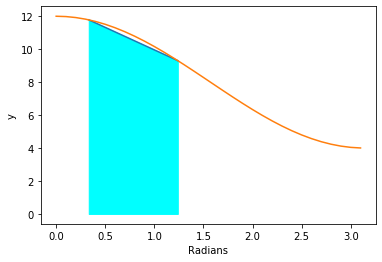

In [7]:
f = lambda x : 8 + (4 * cos(x))

a = 0
b = pi/2
c1 = (b-a)/2
c2 = (b-a)/2
x1 = ((((b-a)/2) * (-1/sqrt(3))) + ((b+a)/2))
x2 = ((((b-a)/2) * (1/sqrt(3))) + ((b+a)/2))

# Gaussian
def gaussian():
    return ((c1 * f(x1)) + (c2 * f(x2)))

# Line of f(x)
x = np.arange(0,np.pi,0.1)
y = 8 + (4 * np.cos(x))

button = widgets.Button(description="Gaussian")
display(button)

def fun1():
    print("Actual Value: 16.56637061435917")
    print("Gaussian 2-Point: " + str(gaussian()))
# Approx Area. using Gaussian 2-Point
    xg = np.linspace(x1, x2)
    yg = np.linspace(f(x1),f(x2))
    plt.plot(xg,yg)
    plt.plot(x,y)
    plt.xlabel("Radians")
    plt.ylabel("y")
    plt.fill_between(xg,yg,color = 'cyan') #Area
    plt.show()
    

def on_button_clicked(b):
    markdown_out = widgets.Output()
    with markdown_out:
        display(Markdown(''.format(fun1())))
    markdown_out
    fun1()
    
button.on_click(on_button_clicked)


# Simpson's Rule

Equation for Gaussian: $\int_{a}^{b}{f\left(x\right)dx\ \approx\ I}\ =[(x_\mathrm{0})\ +\ 4f(x_1)\ +\ 2f(x_2)\ +\ 4f(x_3)+\ .\ ..\ +\ ...\ +\ 2f(x_{n-2})\ +\ 4\ f(x_{n-1})\ +\ f(x_n)]\frac{h}{3}$
<br> Function of x: $\int_{0}^{\pi/2}{(8\ +\ 4\cos{x)}dx\ }$

In [4]:
sum1 = 0.0
sum2 = 0.0
#upper bound
a = 0
#lower bound
b = pi/2
#number of terms
n = 10
#value of delta x
h = (b-a)/n
f = lambda x: 8 + 4 * cos(x)
def simpson(sum1,sum2,a,b,n,h):
    for i in range(1,n,2):
        x = a + i *h 
        sum1 = sum1 + f(x)
    for i in range(2,n-1,2):
        x = a +  i * h
        sum2 = sum2 + f(x)
    simpson = h * (f(a)+ 4* sum1 + 2*sum2+f(b))/3
    return simpson




button = widgets.Button(description="Simpson")
display(button)
def fun2():
    print("Actual Value: 16.56637061435917")
    print("Simpson's Rule: " + str(simpson(sum1,sum2,a,b,n,h)))
    # Line of f(x)
    x = np.arange(0,np.pi,0.1)
    y = 8 + (4 * np.cos(x))
    xg = np.linspace(2, 0)
    yg = np.linspace(f(10.82842712474619),f(0))
    plt.plot(xg,yg)
    plt.plot(x,y)
    plt.xlabel("Radians")
    plt.ylabel("y")
    plt.fill_between(xg,yg,color = 'cyan') #Area
    plt.show()
    
    
    

def on_button_clicked(b):
    fun2()
    
button.on_click(on_button_clicked)




Button(description='Simpson', style=ButtonStyle())

# Trapezoidal Rule

Equation for Trapezoidal : $I = \sum_{i=0}^{n-1} Ii \ = [f\left(x_0\right)\ +\ 2f\left(x_1\right)\ +\ 2f\left(x_2\right)\ +\ ...\ +\ 2f\left(x_{n-1}\right)\ +f\left(x_n\right)]\frac{h}{2} $
<br> Function of x : $\int_{0}^{\pi/2}{(8\ +\ 4\cos{x)}dx\ }$   

In [5]:
f = lambda x: 8 + 4 * cos(x)
a = 0
b = pi/2
n = 2
h = (b-a)/n
def trapezoid(a: float, b: float, n: int) -> float:
    result: float = f(a) + f(b)
    h: int = (b - a)/n

    for i in range(n - 1):
        result += f(a + (h * (1 + i))) * 2

    result = result * h/2

    return result

trapezoidal_array = []

button = widgets.Button(description="Graph of Area")
display(button)
for i in range(2,12):
        trapezoidal_array.append(trapezoid(0, pi/2, i))
def fun3():
    print("Actual Value: 16.56637061435917")
    print("Trapezoidal Rule: " + str(trapezoid(0, pi/2, 2)))

    
    
    plt.figure(figsize=(12,7))
    x = np.linspace(0, 10, 10)
    y = trapezoidal_array
    fig = plt.figure(1); plt.clf()
    ax2 = fig.add_subplot(2,2,2)
    plt.xlabel("n")
    plt.ylabel("Approximated Values")
    ax2.plot(x,y,'-o')

def on_button_clicked(b):
    
    fun3()
    
button.on_click(on_button_clicked)



Button(description='Graph of Area', style=ButtonStyle())

In [6]:
def f(x):
    return 8 + 4 * cos(x)

def exact(x):
    return 8 * x + 4 * sin(x)

def trap(a,b,n):
    h = (b-a) / (n-1)
    sam_trap = (f(a) + f(b)) / 2
    for i in range (1,n-1):
        sam_trap += f(a+(i*h))
    sam_trap *= h
    return(sam_trap)

a = 0 
b = pi/2
n = 10
exact_sum = exact(b) - exact (a)
#empty list to append all my values
Et = []
It = []

button = widgets.Button(description="Graph of Error")
display(button)

def fun4():
    print("N", "\t", "Trapezoid Area", "\t", "Relative Error", "\n")
    for j in range (2,n):
        err_x = abs((trap(a,b,j) - exact_sum) / exact_sum)
        Et.append(err_x)
        It.append(j)
        print(j,"\t", trap(a,b,j), "\t", err_x)

    print("\nThe exact Area is = ", exact_sum)
    plt.figure(figsize=(12,7))
    plt.plot(It,Et)
    plt.xlabel("n")
    plt.ylabel("Relative errors")
    plt.grid()
    plt.show()

def on_button_clicked(b):
    fun4()
    
button.on_click(on_button_clicked)




Button(description='Graph of Error', style=ButtonStyle())

# Conclusion

In conclusion, these are the visual simulations for each of these algorithms, we used 